In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

candels = pickle.load(open('delz_candels.pkl','rb'))

In [3]:
GND12Col = candels[-23]

delz = GND12Col[0]
nearby = GND12Col[1][1]
host = GND12Col[1][2]
lc = GND12Col[1][3]


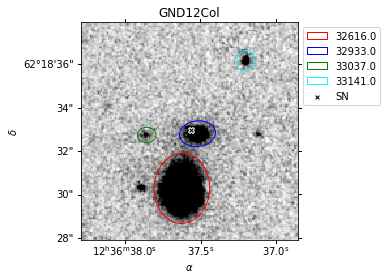

In [7]:
nick = GND12Col[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND12Col[1][0]['RA'],GND12Col[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.008,val_max = .016 )


In [6]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

  id    z     z_spec z_peak  l95   u95 
----- ------ ------- ------ ----- -----
32616 0.9500 -1.0000 0.9535 0.901 1.004
32933 2.1000 -1.0000 2.1048 1.918 2.273
33037 1.6100 -1.0000 1.6058 1.028 2.230
33141 0.7700 -1.0000 0.7671 0.522 0.974


In [8]:
GND12Col[1][0]

name,nickname,col2,decliner,REPROC,RA,DEC,Host RA,Host DEC,zSN,dzSN,zHost,dzHost,Host Morphology,Host SED Type,PIaz,dPIaz,PIaHost,dPIaHost,galsnidShift,zSNold,dzSNold,zSN Source,zHost Source
str9,str12,str1,str1,str1,str12,str13,str12,str13,str5,str6,str8,str7,str7,str7,str4,str11,str4,str11,str5,str6,str6,str23,str47
GND12Col,Colfax,A,0,y,12:36:37.569,+62:18:32.93,12:36:37.514,+62:18:32.66,2.238,0.043,2.1,0.2,s,A,1.00,+0.00 -0.01,1.00,+0.00 -0.00,0.00,2.15,0.1,host+SN phot-z,phot-z (T.Dahlen)


## clear host in my catalog has zpeak ~ 2.1 ~ [1.9,2.3] agrees with the host phot used (Dahlen) in paper

## is published host + SN phot as zSN ~ 2.24 (very likely Ia)

## No need to update, only reason for delz > 1 is the small errors 

## https://iopscience.iop.org/article/10.1088/0004-6256/148/1/13/pdf